In [3]:
import re
import pandas as pd
import numpy as np
import joblib

In [4]:
old = pd.read_csv('perbandingan/berita-24-5.csv')
# print(old)
new = pd.read_csv('perbandingan/berita-24-5.csv') # need changes
# print(new)

In [5]:
# old.columns
old.columns

Index(['ID', 'berita_title', 'berita_date', 'berita_qdate', 'berita_desc',
       'berita_source', 'created_at', 'berita_topik_id', 'qe_what', 'ner_when',
       'ner_who', 'ner_prov', 'ner_kab', 'ner_kec', 'ner_neg', 'sev_death',
       'sev_injury', 'sev_lost', 'sev_sink', 'sev_plane', 'sev_moneyUSD',
       'sev_moneyIDR', 'sev_persen', 'sev_inflasi', 'sev_internasional',
       'sev_nasional', 'sev_provkota', 'sev_lost_items', 'sev_lost_money',
       'sev_rape', 'sev_house', 'sev_person', 'class_classification',
       'berita_summary'],
      dtype='object')

# Comparing What

In [6]:
qe_old = old[['ID', 'berita_title', 'berita_topik_id', 'qe_what']]
# qe_old.head()
qe_new = new[['ID', 'berita_title', 'berita_topik_id', 'qe_what']] # possibly need changes
# qe_old.head()

# Comparing Who

# Comparing When

# Comparing Where

# Comparing Classification 

In [7]:
cls_old = old[['ID', 'berita_title', 'berita_topik_id', 'sev_death', \
       'sev_injury', 'sev_lost', 'sev_sink', 'sev_plane', 'sev_moneyUSD', \
       'sev_moneyIDR', 'sev_persen', 'sev_inflasi', 'sev_internasional', \
       'sev_nasional', 'sev_provkota', 'sev_lost_items', 'sev_lost_money', \
       'sev_rape', 'sev_house', 'sev_person', 'class_classification']]

In [8]:
cls_old.head(1)

,ID,berita_title,berita_topik_id,sev_death,sev_injury,sev_lost,sev_sink,sev_plane,sev_moneyUSD,sev_moneyIDR,...,sev_inflasi,sev_internasional,sev_nasional,sev_provkota,sev_lost_items,sev_lost_money,sev_rape,sev_house,sev_person,class_classification
0,1,Bagaimana Proses Terjadinya Gempa Bumi?,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,sedang


## Bencana

In [9]:
# Bencana Section (Topic id = 1)
cls_old_bencana = cls_old[cls_old['berita_topik_id'] == 1]
cls_old_bencana = cls_old_bencana[['sev_death', 'sev_injury', 'sev_house', 'sev_person']]
# print(len(cls_old_bencana))
cls_old_bencana.rename(columns = {'sev_death':'mati', 'sev_injury':'luka', 'sev_house':'rumah', 'sev_person':'orang'}, inplace=True)
cls_old_bencana.dtypes

mati     float64
luka     float64
rumah    float64
orang    float64
dtype: object

In [10]:
# cls_old_bencana['mati'] = [re.sub("[^0-9]", "", str(mati)) if (re.sub("[^0-9]", "", str(mati)) != '') else 1 for mati in cls_old_bencana['mati']]
cls_old_bencana['mati'] = cls_old_bencana['mati'].astype(int)

# cls_old_bencana['luka'] = [re.sub("[^0-9]", "", str(luka)) if (re.sub("[^0-9]", "", str(luka)) != '') else 1 for luka in cls_old_bencana['luka']]
cls_old_bencana['luka'] = cls_old_bencana['luka'].astype(int)

# cls_old_bencana['rumah'] = [re.sub("[^0-9]", "", str(rumah)) if (re.sub("[^0-9]", "", str(rumah)) != '') else 1 for rumah in cls_old_bencana['rumah']]
cls_old_bencana['rumah'] = cls_old_bencana['rumah'].astype(int)

# cls_old_bencana['orang'] = [re.sub("[^0-9]", "", str(orang)) if (re.sub("[^0-9]", "", str(orang)) != '') else 1 for orang in cls_old_bencana['orang']]
cls_old_bencana['orang'] = cls_old_bencana['orang'].astype(int)
# cls_old_bencana = cls_old_bencana.replace({',': '.'}, regex=True)

cls_old_bencana.head()

,mati,luka,rumah,orang
0,0,0,0,0
1,0,0,5,0
2,1,7729,1,318
3,0,1,0,1
4,0,0,25,230


In [11]:
# naive_bayes_new.ipynb
def matiScale(matiCount: int) -> int:
  if matiCount < 3:
    return 1
  elif matiCount >= 3 and matiCount < 15:
    return 2
  return 3

def lukaScale(lukaCount: int) -> int:
  if lukaCount < 10:
    return 1
  elif lukaCount >= 10 and lukaCount < 20:
    return 2
  return 3

def rumahScale(rumahCount: int) -> int:
  if rumahCount < 4:
    return 1
  elif rumahCount >= 4 and rumahCount <= 20:
    return 2
  return 3

def orangScale(orangCount: int) -> int:
  if orangCount < 10:
    return 1
  elif orangCount >= 10 and orangCount <= 100:
    return 2
  return 3

def calculate(mati: int, luka: int, rumah: int, orang: int):
  subtractor = 0
  total = 0
  fiturCount = 4

  if (mati > 0):
    total += matiScale(matiCount=mati)
  else:
    subtractor += 1

  if (luka > 0):
    total += lukaScale(lukaCount=luka)
  else:
    subtractor += 1

  if (rumah > 0):
    total += rumahScale(rumahCount=rumah)
  else:
    subtractor += 1
  
  if (orang > 0):
    total += orangScale(orangCount=orang)
  else:
    subtractor += 1
          

  divider = (fiturCount - subtractor)
  severityMean = 0

  if (divider > 0):
    severityMean = total / divider

  if severityMean <= 1:
    return 'rendah'
  elif severityMean > 1 and severityMean <= 2:
    return 'sedang'
  else:
    return 'parah'

In [12]:
keparahanValues = []

for index, row in cls_old_bencana.iterrows():
  result = calculate(orang=int(row['orang']), \
      luka=int(row['luka']), \
        rumah=int(row['rumah']), \
          mati=int(row['mati']))
  
  keparahanValues.append(result)

In [13]:
cls_old_bencana['keparahannew'] = keparahanValues
cls_old_bencana.head()

,mati,luka,rumah,orang,keparahannew
0,0,0,0,0,rendah
1,0,0,5,0,sedang
2,1,7729,1,318,sedang
3,0,1,0,1,rendah
4,0,0,25,230,parah


In [14]:
# Declare feature vector and target variable
X = cls_old_bencana.drop(['keparahannew'], axis=1)
y = cls_old_bencana['keparahannew']

In [15]:
X.describe()

,mati,luka,rumah,orang
count,2.773000e+03,2773.000000,2773.000000,2.773000e+03
mean,3.975754e+04,29.438154,1266.150379,2.666879e+04
std,2.088903e+06,457.328387,27543.185997,9.477396e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,0.000000e+00,0.000000,0.000000,0.000000e+00
75%,0.000000e+00,0.000000,1.000000,1.000000e+00
max,1.100000e+08,8724.000000,1000000.000000,4.400000e+07


In [16]:
# Split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
len(X_train)

2218

In [18]:
len(X_test)

555

In [19]:
X_train

,mati,luka,rumah,orang
1313,0,1,1,0
9069,0,0,1,0
9688,0,0,0,1
330,0,0,0,1
757,0,0,0,0
...,...,...,...,...
763,0,0,0,0
835,1,0,0,1
1653,1,0,1,1
9725,0,0,0,0


In [20]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((2218, 4), (555, 4))

In [21]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Create model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Instantiate the model
gnb = GaussianNB()
rf = RandomForestClassifier()
logreg = LogisticRegression(max_iter=3000, solver='lbfgs')
d_tree = DecisionTreeClassifier()
svc=SVC() 
knn = KNeighborsClassifier() # default nilai k = 5
dl = MLPClassifier(solver='lbfgs', max_iter=3000)

## Fit the model
gnb.fit(X_train, y_train)
rf.fit(X_train,y_train)
logreg.fit(X_train, y_train)
d_tree.fit(X_train, y_train)
svc.fit(X_train,y_train)
knn.fit(X_train, y_train)
dl.fit(X_train, y_train)

MLPClassifier(max_iter=3000, solver='lbfgs')

In [81]:
y_pred_gnb = gnb.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_d_tree = d_tree.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dl = dl.predict(X_test)

In [82]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score')
print('Naive Bayes : {0:0.4f}'.format(accuracy_score(y_test, y_pred_gnb)))
print('Random Forest : {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Logistic Regression : {0:0.4f}'.format(accuracy_score(y_test, y_pred_logreg)))
print('Decision Tree : {0:0.4f}'.format(accuracy_score(y_test, y_pred_d_tree)))
print('SVM : {0:0.4f}'.format(accuracy_score(y_test, y_pred_svc)))
print('KNearestNeighbors : {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn)))
print('Deep Learning (MLP) : {0:0.4f}'.format(accuracy_score(y_test, y_pred_dl)))

Model accuracy score
Naive Bayes : 0.8667
Random Forest : 0.9946
Logistic Regression : 0.8090
Decision Tree : 0.9856
SVM : 0.8108
KNearestNeighbors : 0.9550
Deep Learning (MLP) : 0.8468


In [83]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores_gnb = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')
scores_rf = cross_val_score(rf, X_train, y_train, cv = 10, scoring='accuracy')
scores_logreg = cross_val_score(logreg, X_train, y_train, cv = 10, scoring='accuracy')
scores_d_tree = cross_val_score(d_tree, X_train, y_train, cv = 10, scoring='accuracy')
scores_svc = cross_val_score(svc, X_train, y_train, cv = 10, scoring='accuracy')
scores_knn = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')
scores_dl = cross_val_score(dl, X_test, y_test, cv = 10, scoring='accuracy')

# print('Cross-validation scores:{}'.format(scores))

print('Average cross-validation score')
print('Naive Bayes: {:.4f}'.format(scores_gnb.mean()))
print('Random Forest: {:.4f}'.format(scores_rf.mean()))
print('Logistic Regression: {:.4f}'.format(scores_logreg.mean()))
print('Decision Tree: {:.4f}'.format(scores_d_tree.mean()))
print('SVM: {:.4f}'.format(scores_svc.mean()))
print('KNearestNeighbors: {:.4f}'.format(scores_knn.mean()))
print('Deep Learning (MLP): {:.4f}'.format(scores_dl.mean()))

Average cross-validation score
Naive Bayes: 0.8571
Random Forest: 0.9901
Logistic Regression: 0.7958
Decision Tree: 0.9856
SVM: 0.7971
KNearestNeighbors: 0.9396
Deep Learning (MLP): 0.8937


In [84]:
print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9946


In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

Text(0.5, 6.0, 'Predicted Values')

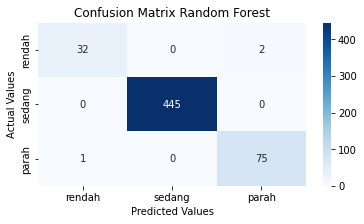

In [57]:
cm=confusion_matrix(y_test,y_pred_rf)
cm_df = pd.DataFrame(cm,
                    index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','parah'])
plt.figure(figsize=(6,3))
plt.title("Confusion Matrix Random Forest")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
# plt.savefig('confusion_matrix.png')

In [52]:
from sklearn.metrics import f1_score

print('f1 score bencana')
print('Naive Bayes: {:.4f}'.format(f1_score(y_test, y_pred_gnb, average='weighted')))
print('Random Forest: {:.4f}'.format(f1_score(y_test, y_pred_rf, average='weighted')))
print('Logistic Regression: {:.4f}'.format(f1_score(y_test, y_pred_logreg, average='weighted')))
print('Decision Tree: {:.4f}'.format(f1_score(y_test, y_pred_d_tree, average='weighted')))
print('SVM: {:.4f}'.format(f1_score(y_test, y_pred_svc, average='weighted')))
print('KNearestNeighbors: {:.4f}'.format(f1_score(y_test, y_pred_knn, average='weighted')))
print('Deep Learning (MLP): {:.4f}'.format(f1_score(y_test, y_pred_dl, average='weighted')))
# f1_score(y_test, y_pred_rf, average='weighted')

f1 score
Naive Bayes: 0.8395
Random Forest: 0.9946
Logistic Regression: 0.7318
Decision Tree: 0.9891
SVM: 0.7332
KNearestNeighbors: 0.9540
Deep Learning (MLP): 0.7903


In [55]:
from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred, target_names=['rendah', 'sedang']))
print(classification_report(y_test, y_pred_rf, target_names=['rendah', 'sedang', 'parah']))

              precision    recall  f1-score   support

      rendah       0.97      0.94      0.96        34
      sedang       1.00      1.00      1.00       445
       parah       0.97      0.99      0.98        76

    accuracy                           0.99       555
   macro avg       0.98      0.98      0.98       555
weighted avg       0.99      0.99      0.99       555



## Ekonomi

In [ ]:
# Ekonomi Section (Topic id = 2)
cls_old_ekonomi = cls_old[cls_old['berita_topik_id'] == 2]
cls_old_ekonomi = cls_old_ekonomi[['sev_moneyUSD', 'sev_moneyIDR', 'sev_persen', 'sev_inflasi']]
# print(len(cls_old_bencana))
cls_old_ekonomi.rename(columns = {'sev_death':'mati', 'sev_injury':'luka', 'sev_house':'rumah', 'sev_person':'orang'}, inplace=True)
cls_old_ekonomi.dtypes

## Kecelakaan

## Kesehatan

## Kriminalitas

## Olahraga